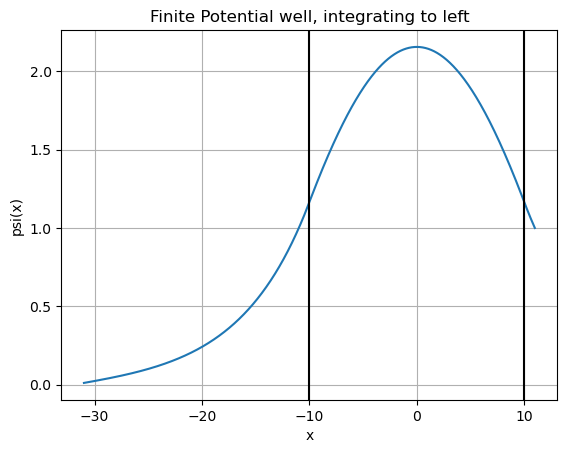

In [1]:
# Integrating to the left

import numpy as np
import matplotlib.pyplot as plt

# Integration accuracy of solution
numsteps = 100000
stepwidth = 0.00001

# Properties of potential well
V0 = 30
wellwidth = 10

# Physical properties of system
hbar = 1
m = 1
E = 8.801             # <- Can't make this greater than V0, or else particle won't be trapped in well

# Integration bounds
xa = np.linspace(11, -31, numsteps + 1)

# Define potential well
def V(xa):
    return 0 if abs(xa) <= wellwidth else V0

# Initial conditions
psi1a = [1]
psi2a = [(np.sqrt(2 * m * (V(xa[0]) - E)) / hbar) * psi1a[0]]

for i in range(numsteps):
    
    y1 = stepwidth * psi2a[-1]
    dy1dx = stepwidth * (2 * m / hbar**2) * (V(xa[i]) - E) * psi1a[-1]

    y2 = stepwidth * (psi2a[-1] + dy1dx / 2)
    dy2dx = stepwidth * (2 * m / hbar**2) * (V(xa[i] - stepwidth / 2) - E) * (psi1a[-1] + y1 / 2)

    y3 = stepwidth * (psi2a[-1] + dy2dx / 2)
    dy3dx = stepwidth * (2 * m / hbar**2) * (V(xa[i] - stepwidth / 2) - E) * (psi1a[-1] + y2 / 2)

    y4 = stepwidth * (psi2a[-1] + dy3dx)
    dy4dx = stepwidth * (2 * m / hbar**2) * (V(xa[i] - stepwidth) - E) * (psi1a[-1] + y3)

    psi1a.append(psi1a[-1] + (y1 + 2*y2 + 2*y3 + y4) / 6)
    psi2a.append(psi2a[-1] + (dy1dx + 2*dy2dx + 2*dy3dx + dy4dx) / 6)
    
plt.plot(xa, psi1a)
plt.axvline(wellwidth, color='black')
plt.axvline(-wellwidth, color='black')
plt.title("Finite Potential well, integrating to left")
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.grid(True)
plt.savefig("potentialleft.png")
plt.show()

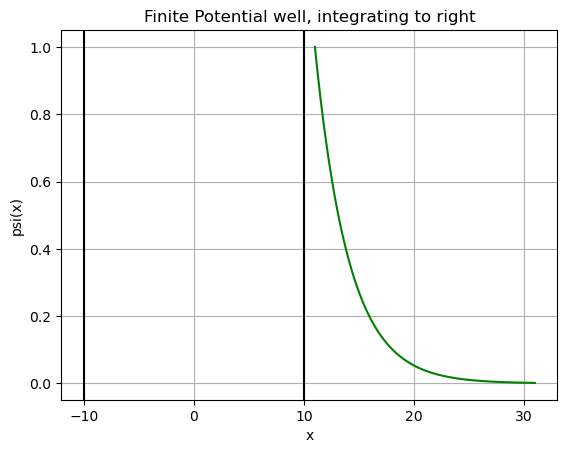

In [2]:
# Integrating to the right

# Integration bounds
xb = np.linspace(11, 31, numsteps + 1)

# Define potential well
def V(xb):
    return 0 if abs(xb) <= wellwidth else V0

# Initial conditions
psi1b = [1]
psi2b = [-(np.sqrt(2 * m * (V(xb[0]) - E)) / hbar) * psi1b[0]]

for i in range(numsteps):
    
    y1 = stepwidth * psi2b[-1]
    dy1dx = stepwidth * (2 * m / hbar**2) * (V(xb[i]) - E) * psi1b[-1]

    y2 = stepwidth * (psi2b[-1] + dy1dx / 2)
    dy2dx = stepwidth * (2 * m / hbar**2) * (V(xb[i] - stepwidth / 2) - E) * (psi1b[-1] + y1 / 2)

    y3 = stepwidth * (psi2b[-1] + dy2dx / 2)
    dy3dx = stepwidth * (2 * m / hbar**2) * (V(xb[i] - stepwidth / 2) - E) * (psi1b[-1] + y2 / 2)

    y4 = stepwidth * (psi2b[-1] + dy3dx)
    dy4dx = stepwidth * (2 * m / hbar**2) * (V(xb[i] - stepwidth) - E) * (psi1b[-1] + y3)

    psi1b.append(psi1b[-1] + (y1 + 2*y2 + 2*y3 + y4) / 6)
    psi2b.append(psi2b[-1] + (dy1dx + 2*dy2dx + 2*dy3dx + dy4dx) / 6)
    
plt.plot(xb, psi1b, color='green')
plt.axvline(wellwidth, color='black')
plt.axvline(-wellwidth, color='black')
plt.title("Finite Potential well, integrating to right")
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.grid(True)
plt.savefig("potentialright.png")
plt.show()

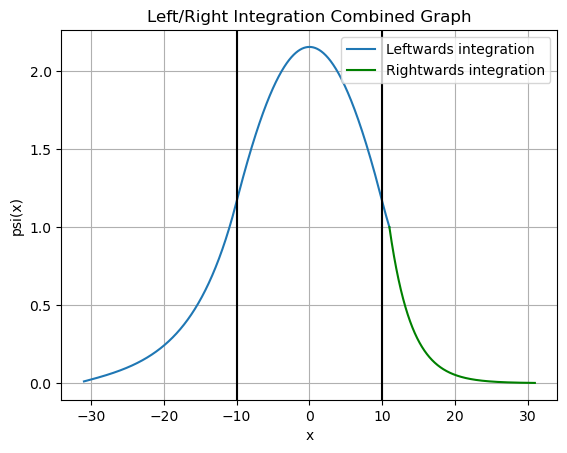

In [3]:
plt.plot(xa, psi1a, label = "Leftwards integration")
plt.plot(xb, psi1b, color='green', label = "Rightwards integration")
plt.axvline(wellwidth, color='black')
plt.axvline(-wellwidth, color='black')
plt.title("Left/Right Integration Combined Graph")
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("potentialboth.png")
plt.show()